In [1]:
import glob
import matplotlib.pyplot as plt
import os
path = input('''This is for X-ray data set. Please copy and paste path to your local data dir:
blank will be set to current directory  ''')
if path in (''):
    path = os.getcwd()
os.chdir(path)
std_list = glob.glob('./*standar*.tif')
dark_list = []
for el in std_list:
    if 'dark' in el:
        dark_list.append(el)
        std_list.remove(el)
print('std_list = {}'.format(std_list))
print('dark_list = {}'.format(dark_list))

This is for X-ray data set. Please copy and paste path to your local data dir:
blank will be set to current directory  ./raw
std_list = ['./ceo2_standard-00001.tif', './ceo2_standard-00002.tif', './ceo2_standard-00003.tif', './CeO2_standard_140mm_300K-00009.tif', './CeO2_standard_400mm_300K-00008.tif', './LaB6_standard_140mm_300K-00007.tif', './LaB6_standard_400mm_300K-00006.tif', './Ni_standard_140mm_300K-00004.tif', './Ni_standard_140mm_300K-00011.tif', './Ni_standard_400mm_300K-00005.tif', './Ni_standard_400mm_300K-00010.tif']
dark_list = ['./ceo2_standard-00001.dark.tif', './ceo2_standard-00002.dark.tif', './ceo2_standard-00003.dark.tif', './CeO2_standard_140mm_300K-00009.dark.tif', './CeO2_standard_400mm_300K-00008.dark.tif', './LaB6_standard_140mm_300K-00007.dark.tif', './LaB6_standard_400mm_300K-00006.dark.tif', './Ni_standard_140mm_300K-00004.dark.tif', './Ni_standard_140mm_300K-00011.dark.tif', './Ni_standard_400mm_300K-00005.dark.tif', './Ni_standard_400mm_300K-00010.dark.tif

In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
import tifffile as tif
import numpy as np

def read_in_array(f_list):
    first_ob= tif.imread(f_list[0])
    obs_len = len(f_list)
    print(obs_len)
    obs_dim = np.shape(first_ob)
    #print(obs_dim)
    pixel_len = obs_dim[0]*obs_dim[1]
    print(pixel_len)
    img_array = []
    for el in f_list:
        img_read = tif.imread(el)
        np.reshape(img_read,(1, pixel_len))
        img_array.append(img_read)
    out= np.reshape(img_array, (obs_len, pixel_len))
    print('dim of img_array = {}'.format(np.shape(out)))
    return out

In [4]:
img_array = read_in_array(std_list)

11
4194304
dim of img_array = (11, 4194304)


In [42]:
#np.savetxt('../data_list.txt',img_array)

In [5]:
from sklearn.mixture import VBGMM
estimator = VBGMM(n_components=4)
fit = estimator.fit(img_array)

<IPython.core.display.Javascript object>


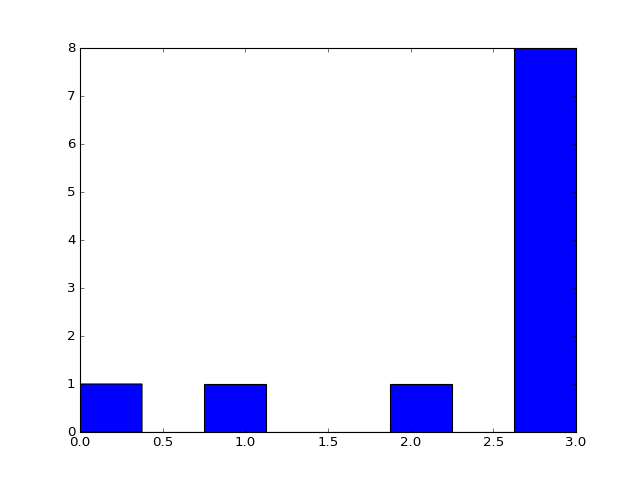

In [20]:
label = fit.predict(img_array)
plt.figure()
plt.hist(label, estimator.n_components*2, align='mid')
plt.show()

In [10]:
label_df = pd.DataFrame(np.transpose(label), np.transpose(std_list))
label_df

,0
./ceo2_standard-00001.tif,3
./ceo2_standard-00002.tif,3
./ceo2_standard-00003.tif,1
./CeO2_standard_140mm_300K-00009.tif,3
./CeO2_standard_400mm_300K-00008.tif,3
./LaB6_standard_140mm_300K-00007.tif,3
./LaB6_standard_400mm_300K-00006.tif,3
./Ni_standard_140mm_300K-00004.tif,3
./Ni_standard_140mm_300K-00011.tif,2
./Ni_standard_400mm_300K-00005.tif,3


<IPython.core.display.Javascript object>


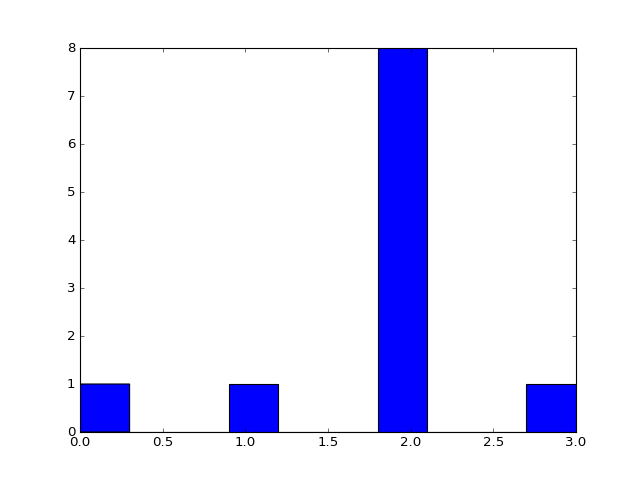

In [8]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(img_array)
k_means_label = kmeans.fit_predict(img_array)
plt.figure()
plt.hist(k_means_label, )
plt.show()

<IPython.core.display.Javascript object>


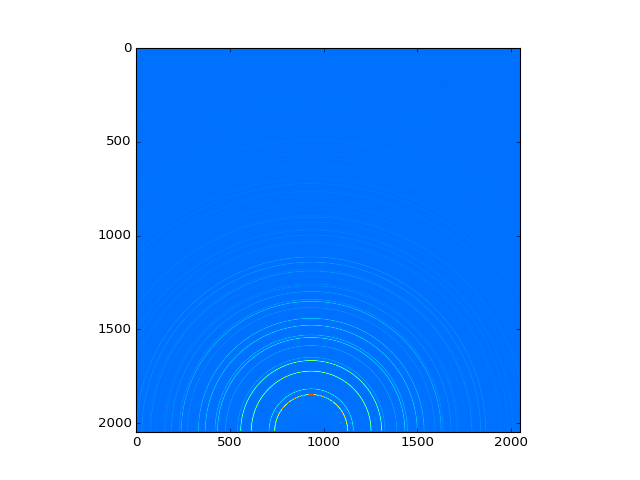

<IPython.core.display.Javascript object>


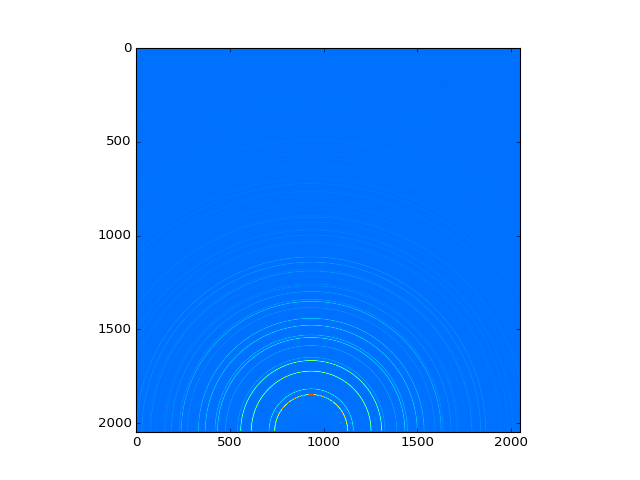

<IPython.core.display.Javascript object>


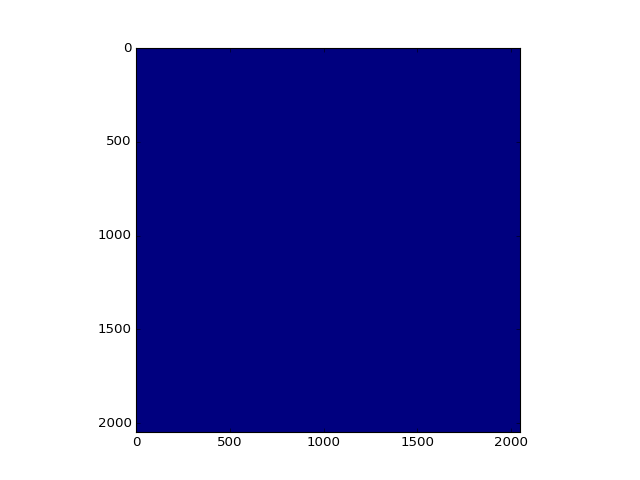

In [11]:
# double check
original_img = tif.imread(std_list[1])
readnin_img = np.reshape(img_array[1],(2048,2048))
diff = original_img - readnin_img
plt.figure()
plt.imshow(original_img)
plt.figure()
plt.imshow(readnin_img)
plt.figure()
plt.imshow(diff)
plt.show()